In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Curso Minedu

Curso: Gestiona entornos virtuales para apoyar el aceeso a los contenidos, actividades y evaluaciones diversificadas 2ed

In [18]:
# Cargamos los datos
df = pd.read_csv("../data/df_encuesta_final.csv",sep=";") 

C:\Users\JuniorOM\AppData\Local\Temp\ipykernel_9492\2394612235.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/df_encuesta_final.csv",sep=";")


In [79]:
# Funcion de nulos y count
# def side_by_side(*objs, **kwds):
#     from pandas.io.formats.printing import adjoin
#     space = kwds.get('space',4)
#     reprs = [repr(obj).split('\n') for obj in objs]
#     print(adjoin(space, *reprs))
#     print()
#     return

### Data Cleaning

In [100]:
# Salida del total filas si tienen valores 
#df.info()

In [19]:
# Elimar columnas 
df1 = df.drop(['Curso'
                ,'Ugel'
                ,'Cargo_otros'
                ,'Nivel_otros'
                ,'Inicial'
                ,'Primaria'
                ,'Secundaria'
                ,'Experiencia_anio'
                ,'Situacion_laboral_Esp'
                ,'p11'
                ,'p12'
                ,'p17'
                ,'p18'
                ,'p17_Esp'
                ,'p18_Esp'
                ,'p19_Esp'
                ,'p19_Esp_1'
                ,'p19_Esp_2'
                ,'p21_Esp'
                ,'pc_00'],axis=1)

In [20]:
df1.columns

Index(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado',
       'Situacion_laboral', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p10', 'p13', 'p14', 'p15', 'p16', 'p19', 'p20', 'p21', 'pc_01',
       'pc_02', 'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],
      dtype='object')

In [21]:
# Reclasificar las variables de importancia 
# p1 al p10
reclass_01 = {"Satisfecho":1,"Muy satisfecho":1,"Poco satisfecho": 0,"Nada satisfecho":0}
df1['p1'] = df1['p1'].map(reclass_01)

reclass_02 = {"Nada satisfecho":1,"Poco satisfecho":2,"Satisfecho":3,"Muy satisfecho":4}
df1['p2'] = df1['p2'].map(reclass_02)
df1['p3'] = df1['p3'].map(reclass_02)
df1['p4'] = df1['p4'].map(reclass_02)
df1['p5'] = df1['p5'].map(reclass_02)
df1['p6'] = df1['p6'].map(reclass_02)
df1['p7'] = df1['p7'].map(reclass_02)
df1['p8'] = df1['p8'].map(reclass_02)
df1['p9'] = df1['p9'].map(reclass_02)
df1['p10'] = df1['p10'].map(reclass_02)
df1['p13'] = df1['p13'].map(reclass_02)
df1['p14'] = df1['p14'].map(reclass_02)

reclass_03 = {'Nada útil':1,'Poco útil':2,"Útil":3,"Muy útil":4}
df1['p15'] = df1['p15'].map(reclass_03)
df1['p16'] = df1['p16'].map(reclass_03)

reclass_04 = {'Sí':1,'No':0}
df1['p19'] = df1['p19'].map(reclass_04)


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33263 entries, 0 to 33262
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             33263 non-null  object 
 1   Edad               33138 non-null  object 
 2   Sexo               33093 non-null  object 
 3   Cargo              33214 non-null  object 
 4   Nivel              33207 non-null  object 
 5   Grado              29016 non-null  object 
 6   Situacion_laboral  33154 non-null  object 
 7   p1                 33263 non-null  int64  
 8   p2                 33263 non-null  int64  
 9   p3                 33263 non-null  int64  
 10  p4                 33263 non-null  int64  
 11  p5                 33263 non-null  int64  
 12  p6                 33263 non-null  int64  
 13  p7                 33263 non-null  int64  
 14  p8                 33263 non-null  int64  
 15  p9                 33263 non-null  int64  
 16  p10                174

In [22]:
df1.nunique()

Region               25
Edad                  5
Sexo                  2
Cargo                 4
Nivel                 7
Grado                 6
Situacion_laboral     3
p1                    2
p2                    4
p3                    4
p4                    4
p5                    4
p6                    4
p7                    4
p8                    4
p9                    4
p10                   4
p13                   4
p14                   4
p15                   4
p16                   4
p19                   2
p20                   4
p21                   9
pc_01                 2
pc_02                 2
pc_03                 2
pc_04                 2
pc_05                 2
pc_06                 2
pc_07                 2
pc_08                 2
pc_09                 2
dtype: int64

### Check Balance

Conteo de Classe p1 : Satisfaccion del Curso
1    31502
0     1761
Name: p1, dtype: int64
(33263, 33)


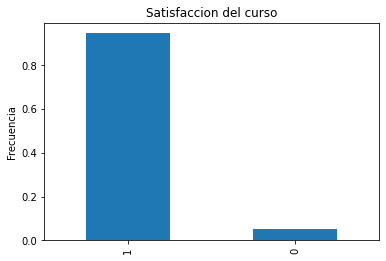

In [31]:
print("Conteo de Classe p1 : Satisfaccion del Curso")
print(df1['p1'].value_counts())
print(df1.shape)
df1['p1'].value_counts(normalize = True).plot(kind='bar')
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()